In [1]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
# 查看训练集信息
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [3]:
# 查看测试集，缺少Label一列
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [4]:
# 查看训练集是否有缺失值,结果是不存在缺失值
print(train.isnull().any().describe())
print()
# 查看测试集是否有缺失值,结果是不存在缺失值
print(test.isnull().any().describe())

count       785
unique        1
top       False
freq        785
dtype: object

count       784
unique        1
top       False
freq        784
dtype: object


In [5]:
# 查看训练集和测试集的行列数
print(train.shape)
print(test.shape)
print(train.head())

(42000, 785)
(28000, 784)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0   

In [6]:
# 将训练集中的特征和标签列分开
X = train.iloc[:,1:]
y = train.iloc[:,0]

D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


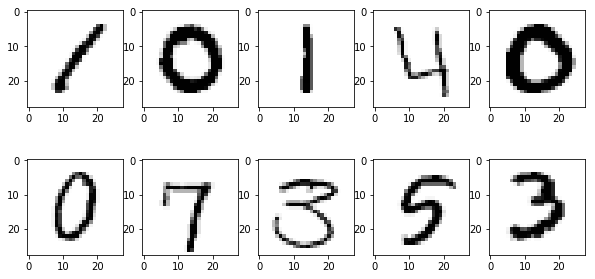

In [7]:
# 查看训练集的数字
plt.figure(figsize = (10,5))

for num in range(0,10):
    plt.subplot(2,5,num+1)
    #将长度为784的向量数据转化为28*28的矩阵
    grid_data = X.iloc[num].as_matrix().reshape(28,28)
    #显示图片，颜色为黑白
    plt.imshow(grid_data, interpolation = "none", cmap = "Greys")

In [8]:
# 特征预处理,将特征的值域规范化
X = MinMaxScaler().fit_transform(X)
print(X)
test = MinMaxScaler().fit_transform(test)

# 分开训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 14)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
# 使用主成分分析,降低维度
all_scores = []
# 生成n_components的取值列表
n_components = np.linspace(0.7,0.9,num=20, endpoint=False)
print(n_components)
def get_accuracy_score(n, X_train, X_test, y_train, y_test):
    '''当主成分为n时,计算模型预测的准确率'''      
    t0 = time()
    pca = PCA(n_components = n)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    # 使用支持向量机分类器
    clf = svm.SVC()
    clf.fit(X_train_pca, y_train)
    # 计算准确度
    accuracy = clf.score(X_test_pca, y_test)
    t1 = time()
    print('n_components:{:.2f} , accuracy:{:.4f} , time elaps:{:.2f}s'.format(n, accuracy, t1-t0))
    return accuracy 

for n in n_components:
    score = get_accuracy_score(n,X_train, X_test, y_train, y_test)
    all_scores.append(score)  

[0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89]
n_components:0.70 , accuracy:0.9750 , time elaps:26.44s
n_components:0.71 , accuracy:0.9757 , time elaps:26.35s
n_components:0.72 , accuracy:0.9769 , time elaps:27.06s
n_components:0.73 , accuracy:0.9760 , time elaps:27.49s
n_components:0.74 , accuracy:0.9776 , time elaps:27.72s
n_components:0.75 , accuracy:0.9781 , time elaps:28.63s
n_components:0.76 , accuracy:0.9781 , time elaps:29.46s
n_components:0.77 , accuracy:0.9781 , time elaps:30.22s
n_components:0.78 , accuracy:0.9783 , time elaps:31.08s
n_components:0.79 , accuracy:0.9776 , time elaps:33.13s
n_components:0.80 , accuracy:0.9779 , time elaps:35.57s
n_components:0.81 , accuracy:0.9771 , time elaps:36.11s
n_components:0.82 , accuracy:0.9774 , time elaps:36.17s
n_components:0.83 , accuracy:0.9769 , time elaps:36.98s
n_components:0.84 , accuracy:0.9755 , time elaps:38.15s
n_components:0.85 , accuracy:0.9748 , time elaps:39.21s
n

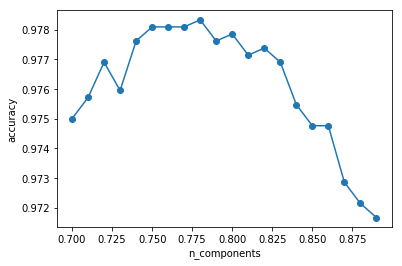

In [10]:
# 画出主成分和准确度的关系图，主成分n_components的临界值为0.78时，精确度最高
plt.plot(n_components, all_scores, '-o')
plt.xlabel('n_components')
plt.ylabel('accuracy')
plt.show()

In [11]:
# 找出识别有误的数据
pca = PCA(n_components = 0.78)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clf = svm.SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

errors = (y_pred != y_test)
y_pred_errors = y_pred[errors]  #预测
y_test_errors = y_test[errors].values  #测试Y
X_test_errors = X_test[errors]   #测试X

In [12]:
# 查看数据
print(y_pred_errors[:5])
print(y_test_errors[:5])
print(X_test_errors[:5])


[5 0 8 6 9]
[8 9 6 8 7]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


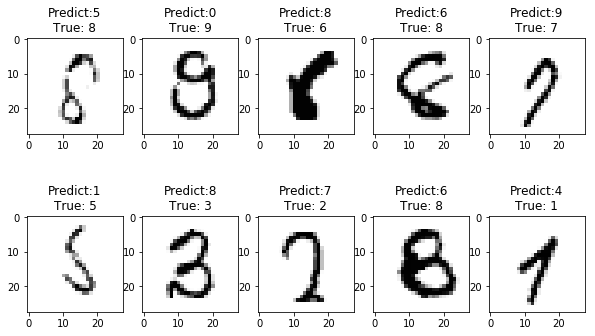

In [13]:
# 数据可视化,查看预测有误的数字
n = 0
nrows = 2
ncols = 5

fig, ax = plt.subplots(nrows,ncols,figsize=(10,6))

for row in range(nrows):
    for col in range(ncols):
        ax[row,col].imshow((X_test_errors[n]).reshape((28,28)), cmap = "Greys")
        ax[row,col].set_title("Predict:{}\nTrue: {}".format(y_pred_errors[n],y_test_errors[n]))
        n += 1

# 建模

In [14]:
# n_components为0.78时, 模型的准确率最高
# 对训练集和测试集进行PCA降低维度处理, 主成分个数为39
pca = PCA(n_components=0.78)
pca.fit(X)
# 打印主成分个数
print(pca.n_components_)
# 对训练集和测试集进行主成分转换
X = pca.transform(X)
test = pca.transform(test)


39


In [15]:
# 使用支持向量机预测,使用网格搜索进行调参

clf_svc = GridSearchCV(estimator=svm.SVC(), param_grid={ 'C': [1, 2, 4, 5], 'kernel': [ 'linear', 'rbf', 'sigmoid' ] }, cv=5, verbose=2 ) 
# 训练算法
clf_svc.fit(X, y)
# 显示使模型准确率最高的参数
print(clf_svc.best_params_)



Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=1, kernel=linear, total=  27.5s
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.4s remaining:    0.0s


[CV] ............................... C=1, kernel=linear, total=  27.7s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=  25.9s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=  26.8s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=  27.5s
[CV] C=1, kernel=rbf .................................................
[CV] .................................. C=1, kernel=rbf, total=  24.5s
[CV] C=1, kernel=rbf .................................................
[CV] .................................. C=1, kernel=rbf, total=  23.8s
[CV] C=1, kernel=rbf .................................................
[CV] .................................. C=1, kernel=rbf, total=  23.7s
[CV] C=1, kernel=rbf .................................................
[CV] .

[CV] .............................. C=5, kernel=sigmoid, total=  32.3s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 32.6min finished


{'C': 5, 'kernel': 'rbf'}


In [16]:
# 预测
preds = clf_svc.predict(test)
image_id = pd.Series(range(1,len(preds)+1))
result_2 = pd.DataFrame({'ImageID': image_id,'Label':preds})
# 保存为CSV文件
result_2.to_csv('result_svc.csv',index = False)
print('Over')

Over
